In [1]:
import gymnasium as gym
import highway_env
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## Agent 1

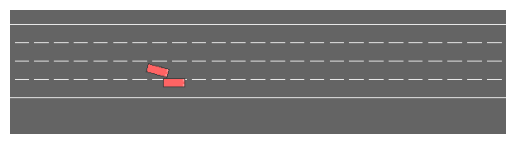

In [2]:
with open("config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("highway-fast-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

# Run and visualize with random discrete actions
for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()

## Agent 2

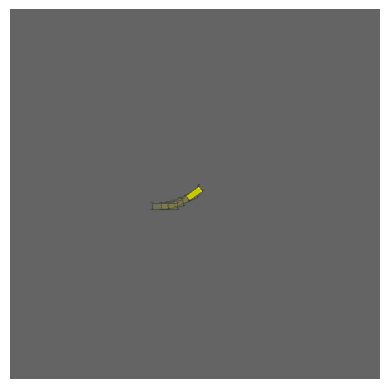

In [3]:
with open("racetrack_config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("racetrack-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

# Run and visualize with random continuous actions
for _ in range(100):
    action = env.action_space.sample()  # Random continuous action
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()

## Agent 3

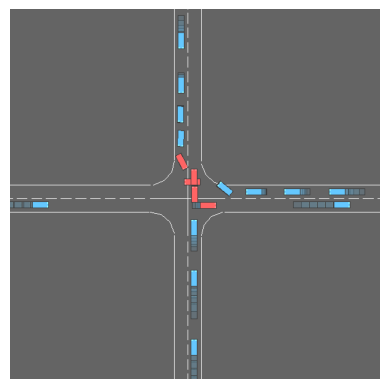

In [4]:
with open("intersection_config.pkl", "rb") as f:
    config = pickle.load(f)

env = gym.make("intersection-v0", render_mode="rgb_array", config=config)
obs, info = env.reset()

for _ in range(100):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

env.close()